## In this notebook, I will:

* Examine parallel trends in a few years worth of recurrence data prior to the program year (August 2019)
* See if the 202 treatment and control Adm 2 districts have the same trajectory in terms of % flooded cropland


* You would need to first split the 161 municipalities between those that are flood prone and those that are not at risk of flooding. You would use for this long term data on flooding at the municipal level.

* The flood group prone will be your T group. The others your C group. Validity of C as a conterfactual to T would be established by testing for parallel trends in the wealth and food indicators between the two group before introduction of flood warning in August 2019.

* Impact would be measured by double difference between the last observation before introduction of the scheme (July  2019) and the last observation under the scheme (October 2020).

* The program is active during the rainy season every year, namely July/Aug to Oct/Nov. You observe 2019 and 2020. There will be similar observations for the 2021 rainy season.

If the test of parallel trends is not satisfied, there is a way of constructing a counterfactual with a "synthetic" method. But we can explore this later according to the results of the parallel rends test.
Does this look OK to you?


In [1]:
import pandas as pd

## load TC assignment
path_input = '/Users/srilakshmi/Desktop/Thesis/Treatment-Control-Assignment/'
name_input_file = 'Final_Adm2_TC_Assignment.csv'
tc_df = pd.read_csv(path_input+name_input_file)

## load people recurrence
path_input = '/Users/srilakshmi/Desktop/Thesis/Data/District-level/People/Output/'
name_input_file = 'District-level_People_Recurrence.csv'
recurrence = pd.read_csv(path_input+name_input_file)

In [2]:
# merge crop recurrence into treatment-control df
df = tc_df.merge(recurrence, left_on='Region', right_on='Region')
df = df.drop('Total_Flood_Risk',axis=1)
df


,Region,Treatment,02Year,05Year,10Year,15Year,20Year
0,Saboba,1,0,0,0,0,16
1,Agona West,1,0,0,0,0,0
2,Karaga,1,0,0,0,0,0
3,West Mamprusi,1,10,20,40,77,87
4,Chereponi,1,0,0,0,0,0
...,...,...,...,...,...,...,...
197,Kadjebi,0,0,0,0,0,0
198,Jaman South,0,0,0,0,0,0
199,Asokore Mampong Municipal,0,0,0,0,0,0
200,Ledzokuku / Krowor,0,0,0,0,0,0


In [3]:
df.groupby('Treatment').size()

Treatment
0    172
1     30
dtype: int64

###  Assumptions:

1. Using flood return periods stands in for observational data. This means that the program year of 2019 corresponds to the **2-year return period** and everything else follows from there.

* 05-year return period corresponds to 2016
* 10-year return period corresponds to 2011
* 15-year return period corresponds to 2006
* 20-year return period corresponds to 2001


In [4]:
mydata = df.groupby('Treatment').mean().reset_index().T
mydata = mydata.drop(mydata.index[0])

mydata.index = ['2019', '2016', '2011', '2006', '2001']


mydata

,0,1
2019,1.406977,3.000000
2016,12.534884,104.600000
2011,30.104651,151.600000
2006,38.575581,175.433333
2001,51.918605,210.633333


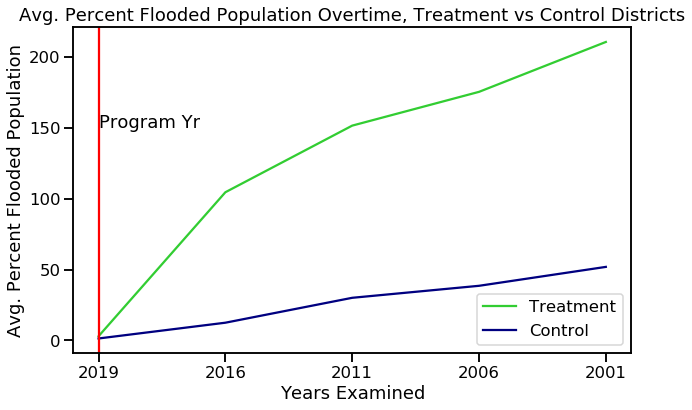

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("talk")
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x = mydata.index, y = mydata[1], label= 'Treatment', color='limegreen')
sns.lineplot(x = mydata.index, y = mydata[0], label='Control', color='navy')

plt.axvline('2019', color='red') # plot vertical line corresponding to treatment year
plt.text('2019', 150, 'Program Yr') # label vertical line

plt.xlabel('Years Examined')
plt.ylabel('Avg. Percent Flooded Population')
plt.title('Avg. Percent Flooded Population Overtime, Treatment vs Control Districts')

plt.legend()
plt.show()